# Time for a Test Drive!

You've spent some time walking around the Dascar lot, hearing about all the awesome features and specs...

That's enough talk! Let's jump into a racecar and see what it can do!

We'll test drive:

1. Dask DataFrames for faster & scalable pandas
2. Dask Arrays for faster & scalable NumPy
3. Dask-ML for faster & scalable scikit-learn
4. Coiled for cluster spin-up

![](racecar.png "Title")

## Dask DataFrames

The pandas car...with the Dask engine!

In [1]:
import dask.dataframe as dd

In [2]:
%run ../prep_data.py -d flights

data_dir='/Users/rpelgrim/Documents/git/coiled-resources/dask-tutorial/data'


In [3]:
import os

files = os.path.join('../data', 'nycflights', '*.csv')
files

'../data/nycflights/*.csv'

In [4]:
df = dd.read_csv(files,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={"TailNum": str,
                        "CRSElapsedTime": float,
                        "Cancelled": bool})

In [5]:
df.head()

Date  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
0 1990-01-01          1   1621.0        1540   1747.0        1701   
1 1990-01-02          2   1547.0        1540   1700.0        1701   
2 1990-01-03          3   1546.0        1540   1710.0        1701   
3 1990-01-04          4   1542.0        1540   1710.0        1701   
4 1990-01-05          5   1549.0        1540   1706.0        1701   

  UniqueCarrier  FlightNum TailNum  ActualElapsedTime  ...  AirTime  ArrDelay  \
0            US         33     NaN               86.0  ...      NaN      46.0   
1            US         33     NaN               73.0  ...      NaN      -1.0   
2            US         33     NaN               84.0  ...      NaN       9.0   
3            US         33     NaN               88.0  ...      NaN       9.0   
4            US         33     NaN               77.0  ...      NaN       5.0   

   DepDelay  Origin Dest Distance  TaxiIn  TaxiOut  Cancelled  Diverted  
0      41.0     EWR  PIT    319.0     NaN      NaN      False         0  
1       7.0     EWR  PIT    319.0     NaN      NaN      False         0  
2       6.0     EWR  PIT    319.0     NaN      NaN      False         0  
3       2.0     EWR  PIT    319.0     NaN      NaN      False         0  
4       9.0     EWR  PIT    319.0     NaN      NaN      False         0  

[5 rows x 21 columns]

In [6]:
%%time
df.groupby("Origin")["DepDelay"].mean().compute()

CPU times: user 3.21 s, sys: 633 ms, total: 3.84 s
Wall time: 1.79 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

### A slight difference with pandas
Notice the `.compute()` call: this is necessary because Dask operates using something called **lazy evaluation**.

If you haven't heard about lazy evaluation before, [Mercutio the Mouseketeer's explanation](https://towardsdatascience.com/the-beginners-guide-to-distributed-computing-6d6833796318) might help.|

In [7]:
df

Dask DataFrame Structure:
                          Date DayOfWeek  DepTime CRSDepTime  ArrTime CRSArrTime UniqueCarrier FlightNum TailNum ActualElapsedTime CRSElapsedTime  AirTime ArrDelay DepDelay  Origin    Dest Distance   TaxiIn  TaxiOut Cancelled Diverted
npartitions=10                                                                                                                                                                                                                            
                datetime64[ns]     int64  float64      int64  float64      int64        object     int64  object           float64        float64  float64  float64  float64  object  object  float64  float64  float64      bool    int64
                           ...       ...      ...        ...      ...        ...           ...       ...     ...               ...            ...      ...      ...      ...     ...     ...      ...      ...      ...       ...      ...
...                        ...       ...      ...        ...      ...        ...           ...       ...     ...               ...            ...      ...      ...      ...     ...     ...      ...      ...      ...       ...      ...
                           ...       ...      ...        ...      ...        ...           ...       ...     ...               ...            ...      ...      ...      ...     ...     ...      ...      ...      ...       ...      ...
                           ...       ...      ...        ...      ...        ...           ...       ...     ...               ...            ...      ...      ...      ...     ...     ...      ...      ...      ...       ...      ...
Dask Name: read-csv, 10 tasks

## Dask Arrays

The Numpy car...with Dask engine superpowers!

In [8]:
import dask.array as da

In [9]:
array = da.random.random((10_000, 10_000), chunks=(1_000, 1_000))

In [10]:
array

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [11]:
array[:10,:5]

dask.array<getitem, shape=(10, 5), dtype=float64, chunksize=(10, 5), chunktype=numpy.ndarray>

In [12]:
array[:10,:5].compute()

array([[0.65312477, 0.48980992, 0.44491704, 0.19098814, 0.51713427],
       [0.55449186, 0.04354127, 0.82433677, 0.7808486 , 0.32348022],
       [0.60127802, 0.97302262, 0.30340258, 0.28582463, 0.26829827],
       [0.82241605, 0.36322656, 0.37937508, 0.8822862 , 0.96097562],
       [0.27803984, 0.57519962, 0.49135503, 0.73740513, 0.47067836],
       [0.2542007 , 0.3142352 , 0.84039979, 0.52264186, 0.37579502],
       [0.09814472, 0.1586646 , 0.84896594, 0.69607909, 0.54845547],
       [0.29993132, 0.03572533, 0.84509098, 0.33174621, 0.31299483],
       [0.61283475, 0.25558837, 0.7756338 , 0.63577547, 0.04194579],
       [0.10608459, 0.82495367, 0.22602471, 0.62183352, 0.57785028]])

In [13]:
%%time
array.sum(axis=1).compute()

CPU times: user 623 ms, sys: 129 ms, total: 752 ms
Wall time: 177 ms


array([5008.64159682, 4973.86003181, 4951.85521165, ..., 4972.34635304,
       5022.63035669, 5000.33014766])

## Dask ML

The scikit-learn car with.... you guessed it -- Dask rocketfuel!

In [14]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.datasets import make_classification

In [15]:
X, y = make_classification(n_samples=1_000, chunks=50)

In [16]:
X

dask.array<normal, shape=(1000, 20), dtype=float64, chunksize=(50, 20), chunktype=numpy.ndarray>

In [17]:
y

dask.array<astype, shape=(1000,), dtype=int64, chunksize=(50,), chunktype=numpy.ndarray>

In [18]:
lr = LogisticRegression()

In [19]:
%%time
lr.fit(X, y)

CPU times: user 2.54 s, sys: 689 ms, total: 3.23 s
Wall time: 2.64 s


LogisticRegression()

In [20]:
%%time
predictions = lr.predict(X).compute()

CPU times: user 35.8 ms, sys: 4.95 ms, total: 40.8 ms
Wall time: 36.8 ms


In [21]:
lr.score(X,y).compute()

0.664

# For the Mechanics in the Room

Dask's lower-level APIs give you even more flexibility and control over what / how to parallelize your custom Python code.

## Parallelize Python Code with `dask.delayed`

In [22]:
from time import sleep

def inc(x):
    """Increments x by one"""
    sleep(1)
    return x + 1

def add(x=0, y=0, z=0):
    """Adds x and y and z"""
    sleep(1)
    return x + y + z

In [23]:
%%time

x = inc(1) # takes 1 second
y = inc(2) # takes 1 second
z = add(x, y) # takes 1 second

CPU times: user 1.4 ms, sys: 2.42 ms, total: 3.82 ms
Wall time: 3.01 s


In [24]:
z

5

In [25]:
from dask import delayed

In [26]:
%%time

a = delayed(inc)(1)
b = delayed(inc)(2)
c = delayed(add)(a, b)

CPU times: user 296 µs, sys: 60 µs, total: 356 µs
Wall time: 335 µs


In [27]:
c

Delayed('add-7036231c-87d3-4adb-ba29-4e6185c91b6a')

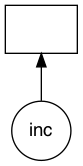

In [28]:
a.visualize()

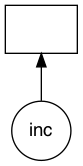

In [29]:
b.visualize()

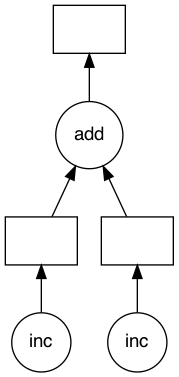

In [30]:
c.visualize()

In [31]:
d = delayed(inc)(3)

In [32]:
c = delayed(add)(a, b, d)

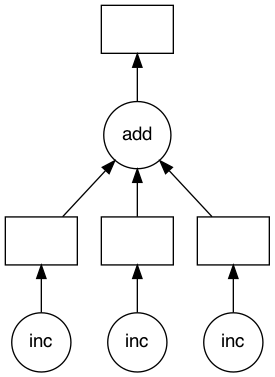

In [33]:
c.visualize()

In [34]:
%%time
c.compute()

CPU times: user 3.72 ms, sys: 3.64 ms, total: 7.36 ms
Wall time: 2.01 s


9

![](task-graph.png)

## Dask Cluster on Coiled

In [35]:
import coiled

In [36]:
cluster = coiled.Cluster(
    name="dask-tutorial", 
    n_workers=20, 
    worker_memory='25Gib',
    software="rrpelgrim/dask-mini-tutorial",
    scheduler_options={'idle_timeout':'2 hours'}, # default is 20min
    shutdown_on_close=False,
    backend_options={'spot': True},
)

Output()

Found software environment build
Created fw rule: inbound [8786-8787] [0.0.0.0/0] []
Created FW rules: coiled-dask-rrpelgr71-139888-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-rrpelgr71-139888-firewall -> coiled-dask-rrpelgr71-139888-firewall]
Created FW rules: coiled-dask-rrpelgr71-139888-cluster-firewall
Created fw rule: cluster [0-65535] [None] [coiled-dask-rrpelgr71-139888-cluster-firewall -> coiled-dask-rrpelgr71-139888-cluster-firewall]
Created scheduler VM: coiled-dask-rrpelgr71-139888-scheduler (type: t3.medium, ip: ['3.218.142.88'])


In [37]:
from distributed import Client

client = Client(cluster)
client

/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| pandas  | 1.4.2  | 1.4.0     | 1.4.0   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tls://10.4.15.191:8786' processes=20 threads=160, memory=620.19 GiB>

In [38]:
import dask.dataframe as dd

In [39]:
df = dd.read_csv(
    "s3://nyc-tlc/trip data/yellow_tripdata_2019-*.csv",
    parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"],
    dtype={
        "payment_type": "UInt8",
        "VendorID": "UInt8",
        "passenger_count": "UInt8",
        "RatecodeID": "UInt8",
        "store_and_fwd_flag": "category",
        "PULocationID": "UInt16",
        "DOLocationID": "UInt16",
    },
    storage_options={"anon": True},
    blocksize="16 MiB",
)

In [40]:
df

Dask DataFrame Structure:
                VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count trip_distance RatecodeID store_and_fwd_flag PULocationID DOLocationID payment_type fare_amount    extra  mta_tax tip_amount tolls_amount improvement_surcharge total_amount congestion_surcharge
npartitions=471                                                                                                                                                                                                                                                                     
                   UInt8       datetime64[ns]        datetime64[ns]           UInt8       float64      UInt8  category[unknown]       UInt16       UInt16        UInt8     float64  float64  float64    float64      float64               float64      float64              float64
                     ...                  ...                   ...             ...           ...        ...                ...          ...          ...          ...         ...      ...      ...        ...          ...                   ...          ...                  ...
...                  ...                  ...                   ...             ...           ...        ...                ...          ...          ...          ...         ...      ...      ...        ...          ...                   ...          ...                  ...
                     ...                  ...                   ...             ...           ...        ...                ...          ...          ...          ...         ...      ...      ...        ...          ...                   ...          ...                  ...
                     ...                  ...                   ...             ...           ...        ...                ...          ...          ...          ...         ...      ...      ...        ...          ...                   ...          ...                  ...
Dask Name: read-csv, 471 tasks

In [41]:
%%time
df.groupby("passenger_count").tip_amount.mean().compute()

CPU times: user 413 ms, sys: 101 ms, total: 514 ms
Wall time: 54.2 s


passenger_count
0    2.122789
1    2.206790
2    2.214306
3    2.137775
4    2.023804
5    2.235441
6    2.221105
7    6.675962
8    7.111625
9    7.377822
Name: tip_amount, dtype: float64

/Users/rpelgrim/mambaforge/envs/dask-mini-tutorial/lib/python3.9/site-packages/distributed/client.py:1128: VersionMismatchWarning: Mismatched versions found

+---------+--------+-----------+---------+
| Package | client | scheduler | workers |
+---------+--------+-----------+---------+
| pandas  | 1.4.2  | 1.4.0     | 1.4.0   |
+---------+--------+-----------+---------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))
distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
